## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import pickle

In [2]:
pd.set_option('display.max_columns',None)

## Data ingestion

In [3]:
churn=pd.read_csv('cell2celltrain.csv')
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
churn.shape

(51047, 58)

In [5]:
churn['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
CustomerID                   51047 non-null int64
Churn                        51047 non-null object
MonthlyRevenue               50891 non-null float64
MonthlyMinutes               50891 non-null float64
TotalRecurringCharge         50891 non-null float64
DirectorAssistedCalls        50891 non-null float64
OverageMinutes               50891 non-null float64
RoamingCalls                 50891 non-null float64
PercChangeMinutes            50680 non-null float64
PercChangeRevenues           50680 non-null float64
DroppedCalls                 51047 non-null float64
BlockedCalls                 51047 non-null float64
UnansweredCalls              51047 non-null float64
CustomerCareCalls            51047 non-null float64
ThreewayCalls                51047 non-null float64
ReceivedCalls                51047 non-null float64
OutboundCalls                51047 non-null float64
InboundCal

In [7]:
# Check whether data is balanced or not
churn['Churn'].value_counts()/churn.shape[0]

No     0.711815
Yes    0.288185
Name: Churn, dtype: float64

#### Hence 28.81% is churned customers 

In [8]:
churn.isna().sum().values.sum()

3515

In [9]:
#missing value 
missing=list()
for x in churn.columns:
    if churn[x].isnull().sum() != 0:
        print(x, churn[x].isnull().sum())
        missing.append(x)
missing

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909


['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

## Missing value Treatment

In [10]:
churn[churn['DirectorAssistedCalls']==0].shape

(24512, 58)

In [11]:
churn['DirectorAssistedCalls'].describe()

count    50891.000000
mean         0.895229
std          2.228546
min          0.000000
25%          0.000000
50%          0.250000
75%          0.990000
max        159.390000
Name: DirectorAssistedCalls, dtype: float64

In [12]:
churn.Churn[churn.DirectorAssistedCalls == 0].value_counts()

No     17216
Yes     7296
Name: Churn, dtype: int64

In [13]:
churn[churn['MonthlyRevenue']==0].shape

(6, 58)

In [14]:
churn[churn['MonthlyMinutes']==0].shape

(723, 58)

In [15]:
churn[churn['TotalRecurringCharge']==0].shape

(160, 58)

In [16]:
churn[churn['OverageMinutes']==0].shape

(23262, 58)

In [17]:
churn[churn['RoamingCalls']==0].shape

(34947, 58)

In [18]:
churn[churn['PercChangeMinutes']==0].shape

(1124, 58)

In [19]:
churn[churn['PercChangeRevenues']==0].shape

(5818, 58)

In [20]:
churn.Churn[churn['AgeHH1']==0].value_counts()

No     9711
Yes    4206
Name: Churn, dtype: int64

In [21]:
churn.Churn[churn['AgeHH2']==0].value_counts()

No     18440
Yes     7647
Name: Churn, dtype: int64

### So from the above conclusion we can impute 0 in the missing values 

In [22]:
churn=churn.fillna(0)

In [23]:
churn.isna().sum().values.sum()

0

In [24]:
#get a list of categoricals
categoricals = list()
for x in churn.columns:
    if churn[x].dtype == 'object':
        categoricals.append(x)
churn[categoricals].nunique()

Churn                        2
ServiceArea                748
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

## Data Visualization for categorical features

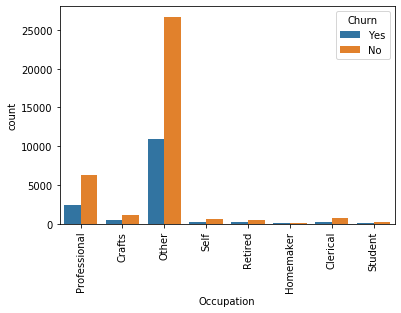

In [25]:
sns.countplot(x='Occupation',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

In [26]:
Occupation_crosstab = pd.crosstab(churn['Churn'], 
                                   churn['Occupation'], 
                                   margins=True,
                                   normalize=False)
Occupation_crosstab

Occupation,Clerical,Crafts,Homemaker,Other,Professional,Retired,Self,Student,All
Churn,,,,,,,,,
No,697,1093,106,26705,6288,548,636,263,36336
Yes,289,426,51,10932,2467,185,243,118,14711
All,986,1519,157,37637,8755,733,879,381,51047


In [27]:
Occupation_percentage =  Occupation_crosstab / Occupation_crosstab.loc['All']
Occupation_percentage

Occupation,Clerical,Crafts,Homemaker,Other,Professional,Retired,Self,Student,All
Churn,,,,,,,,,
No,0.706897,0.719552,0.675159,0.709541,0.718218,0.747613,0.723549,0.690289,0.711815
Yes,0.293103,0.280448,0.324841,0.290459,0.281782,0.252387,0.276451,0.309711,0.288185
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


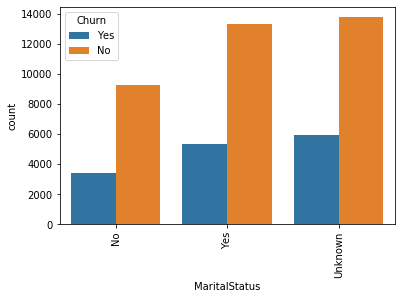

In [28]:
sns.countplot(x='MaritalStatus',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

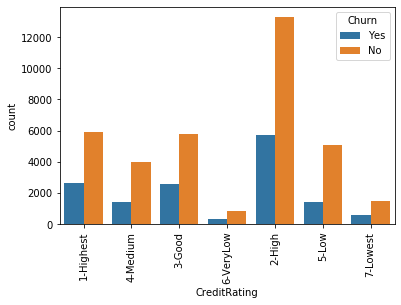

In [29]:
sns.countplot(x='CreditRating',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

In [30]:
credit_crosstab = pd.crosstab(churn['Churn'], 
                                   churn['CreditRating'], 
                                   margins=True,
                                   normalize=False)
credit_crosstab

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest,All
Churn,,,,,,,,
No,5894,13281,5802,3958,5063,836,1502,36336
Yes,2628,5712,2608,1399,1436,316,612,14711
All,8522,18993,8410,5357,6499,1152,2114,51047


In [31]:
credit_percentage =  credit_crosstab / credit_crosstab.loc['All']
credit_percentage

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest,All
Churn,,,,,,,,
No,0.691622,0.699258,0.689893,0.738846,0.779043,0.725694,0.710501,0.711815
Yes,0.308378,0.300742,0.310107,0.261154,0.220957,0.274306,0.289499,0.288185
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


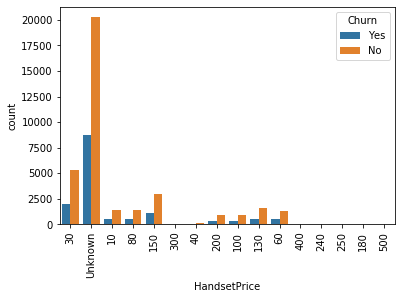

In [32]:
sns.countplot(x='HandsetPrice',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

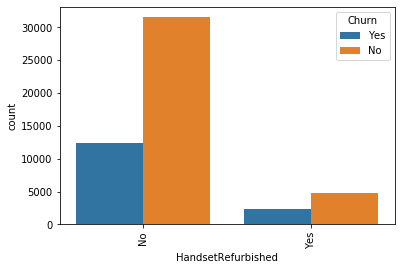

In [33]:
sns.countplot(x='HandsetRefurbished',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

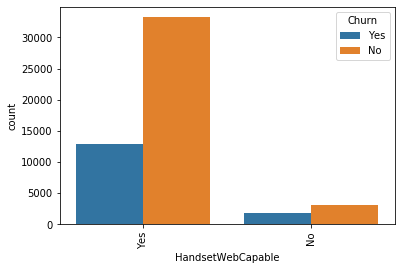

In [34]:
sns.countplot(x='HandsetWebCapable',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

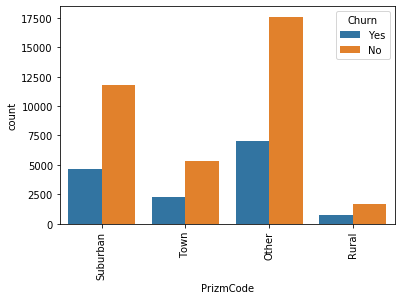

In [35]:
sns.countplot(x='PrizmCode',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

In [36]:
PrizmCode_crosstab = pd.crosstab(churn['Churn'], 
                                   churn['PrizmCode'], 
                                   margins=True,
                                   normalize=False)
PrizmCode_crosstab

PrizmCode,Other,Rural,Suburban,Town,All
Churn,,,,,
No,17598,1656,11769,5313,36336
Yes,7057,769,4609,2276,14711
All,24655,2425,16378,7589,51047


In [37]:
Prizmcode_percentage =  PrizmCode_crosstab / PrizmCode_crosstab.loc['All']
Prizmcode_percentage

PrizmCode,Other,Rural,Suburban,Town,All
Churn,,,,,
No,0.71377,0.682887,0.718586,0.700092,0.711815
Yes,0.28623,0.317113,0.281414,0.299908,0.288185
All,1.00000,1.000000,1.000000,1.000000,1.000000


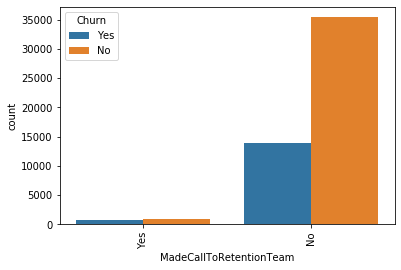

In [38]:
sns.countplot(x='MadeCallToRetentionTeam',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.show()

In [39]:
Retention_crosstab = pd.crosstab(churn['Churn'], 
                                   churn['MadeCallToRetentionTeam'], 
                                   margins=True,
                                   normalize=False)
Retention_crosstab

MadeCallToRetentionTeam,No,Yes,All
Churn,,,
No,35377,959,36336
Yes,13925,786,14711
All,49302,1745,51047


In [40]:
Retention_percentage =  Retention_crosstab / Retention_crosstab.loc['All']
Retention_percentage

MadeCallToRetentionTeam,No,Yes,All
Churn,,,
No,0.717557,0.54957,0.711815
Yes,0.282443,0.45043,0.288185
All,1.000000,1.00000,1.000000


## Data Distribution of numerical features

In [41]:
def plot_distro(churn, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(10,10))
    plt.grid(True)
    sns.distplot(churn[col][churn.Churn == 'Yes'])
    sns.distplot(churn[col][churn.Churn == 'No'])
    plt.legend(['churn_flag_yes', 'churn_flag_no'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)

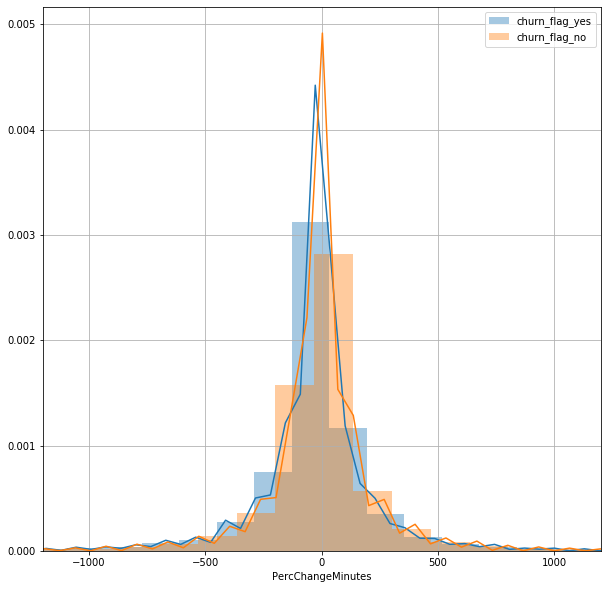

In [42]:
plot_distro(churn, col='PercChangeMinutes', x_limit_r=1200, x_limit_l=-1200)

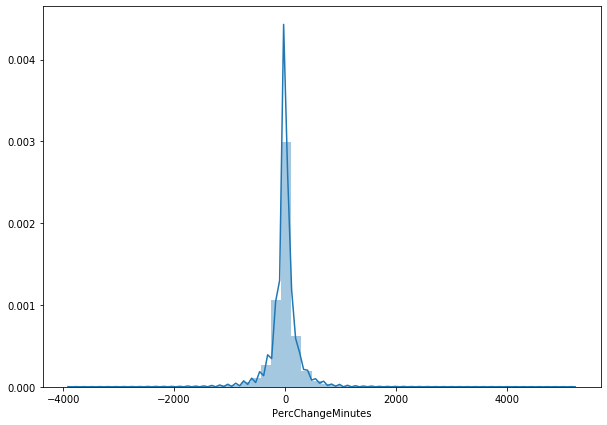

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(churn['PercChangeMinutes'])
plt.show()

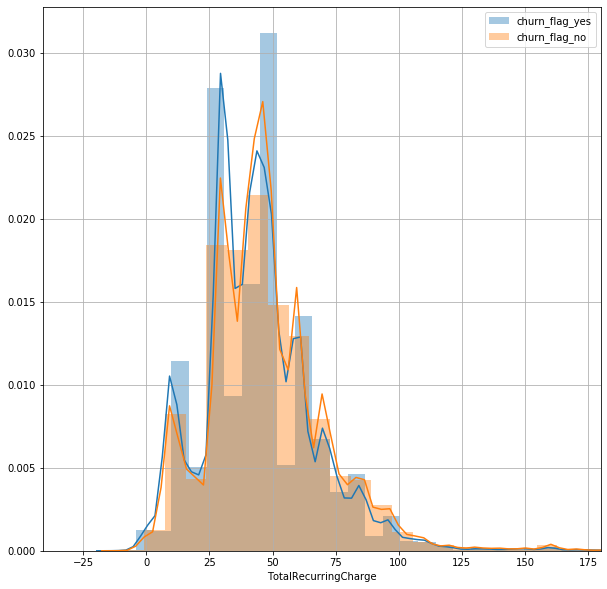

In [44]:
plot_distro(churn, col='TotalRecurringCharge', x_limit_r=180)

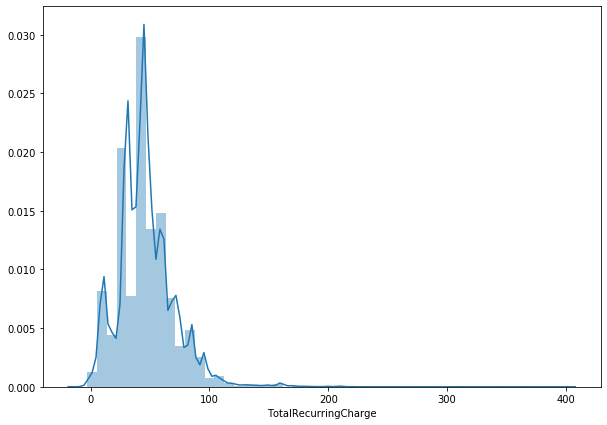

In [45]:
plt.figure(figsize=(10,7))
sns.distplot(churn['TotalRecurringCharge'])
plt.show()

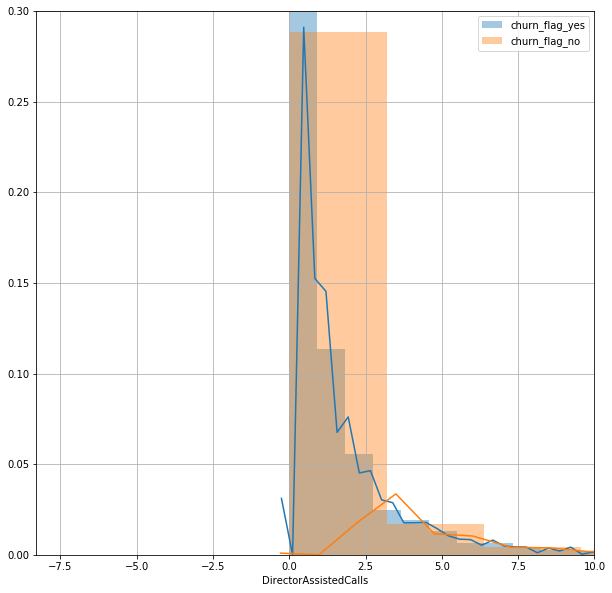

In [46]:
plot_distro(churn, col='DirectorAssistedCalls', y_limit=.3, x_limit_r=10)

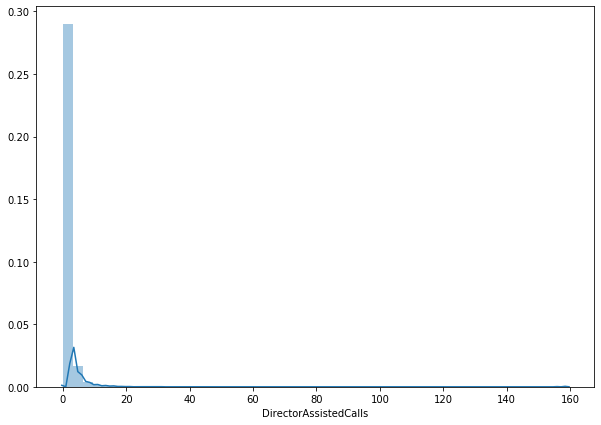

In [47]:
plt.figure(figsize=(10,7))
sns.distplot(churn['DirectorAssistedCalls'])
plt.show()

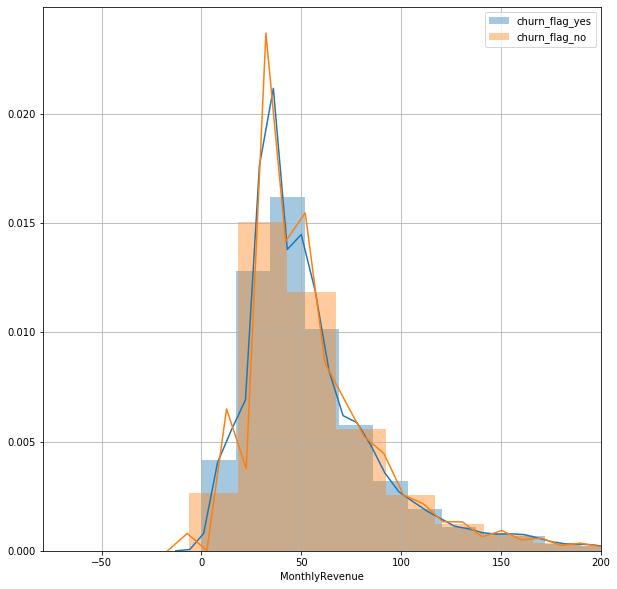

In [48]:
plot_distro(churn, col='MonthlyRevenue', x_limit_r=200)

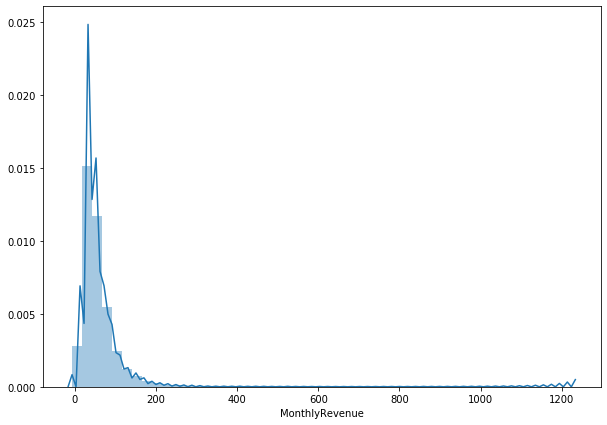

In [49]:
plt.figure(figsize=(10,7))
sns.distplot(churn['MonthlyRevenue'])
plt.show()

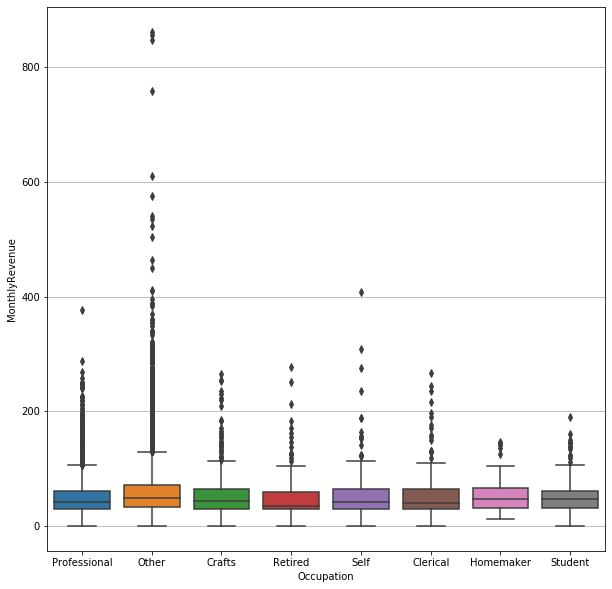

In [50]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x=churn.Occupation[churn.Churn == 'Yes'], y=churn.MonthlyRevenue[churn.Churn == 'Yes'])
plt.show()

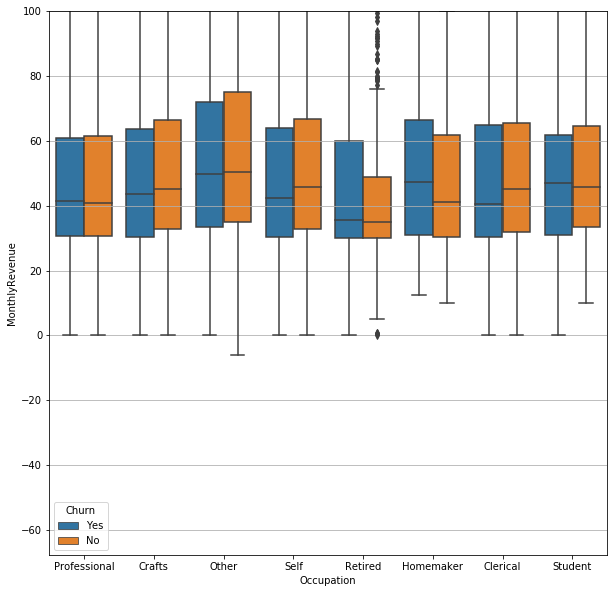

In [51]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x=churn.Occupation, y=churn.MonthlyRevenue, hue=churn.Churn)
plt.ylim(top=100)
plt.show()

In [52]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


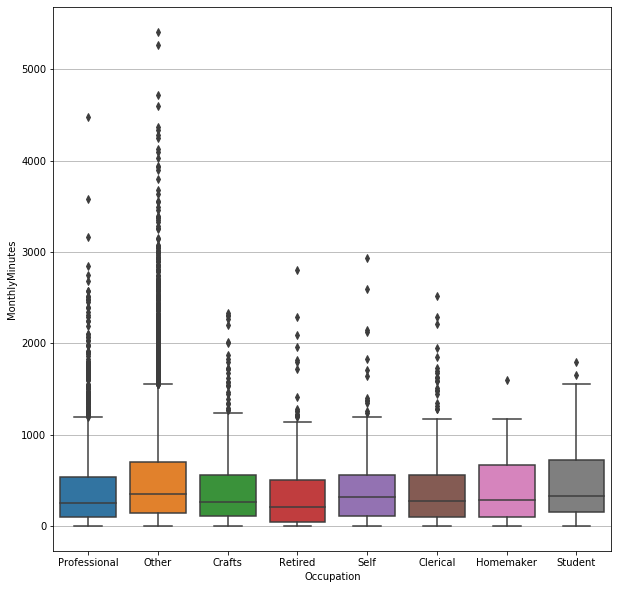

In [53]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x=churn.Occupation[churn.Churn == 'Yes'], y=churn.MonthlyMinutes[churn.Churn == 'Yes'])
plt.show()

In [54]:
churn['MonthlyMinutes'].describe()

count    51047.000000
mean       524.047015
std        529.855789
min          0.000000
25%        156.000000
50%        365.000000
75%        722.000000
max       7359.000000
Name: MonthlyMinutes, dtype: float64

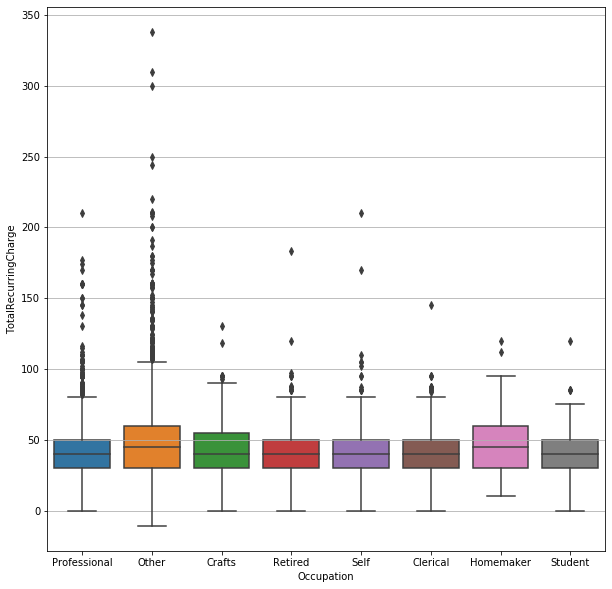

In [55]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x=churn.Occupation[churn.Churn == 'Yes'], y=churn.TotalRecurringCharge[churn.Churn == 'Yes'])
plt.show()

In [56]:
churn.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [57]:
churn['Churn']=churn['Churn'].replace({'Yes':1,'No':0})
churn['Churn'].value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

In [58]:
x=churn[['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs','Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser','ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']]
y=churn['Churn']

## Dummification of categorical features

In [59]:
x=pd.get_dummies(x,drop_first=True)
x.shape

(51047, 82)

## Splitting the data

In [60]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [61]:
skf=StratifiedKFold(n_splits=7,random_state=0)

In [62]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 7287  7288  7291 ... 51044 51045 51046] TEST: [   0    1    2 ... 7301 7306 7308]
TRAIN: [    0     1     2 ... 51044 51045 51046] TEST: [ 7287  7288  7291 ... 14622 14623 14625]
TRAIN: [    0     1     2 ... 51044 51045 51046] TEST: [14447 14450 14459 ... 22022 22025 22026]
TRAIN: [    0     1     2 ... 51044 51045 51046] TEST: [21470 21477 21481 ... 29821 29824 29825]
TRAIN: [    0     1     2 ... 51044 51045 51046] TEST: [28008 28017 28018 ... 37455 37457 37458]
TRAIN: [    0     1     2 ... 51044 51045 51046] TEST: [34281 34283 34284 ... 44563 44564 44566]
TRAIN: [    0     1     2 ... 44563 44564 44566] TEST: [41246 41247 41248 ... 51044 51045 51046]


In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43756, 82)
(7291, 82)
(43756,)
(7291,)


In [64]:
a=list()
b=list()
for i in y_train:
    if i==1:
        a.append(i)
    else:
        b.append(i)
print(len(a))
print(len(b))

12610
31146


In [65]:
a=list()
b=list()
for i in y_test:
    if i==1:
        a.append(i)
    else:
        b.append(i)
print(len(a))
print(len(b))

2101
5190


## Feature selection

In [66]:
from sklearn.feature_selection import VarianceThreshold

In [67]:
# Constant feature removal
quasi_filter=VarianceThreshold(threshold=0.05)
quasi_filter.fit(x_train)

VarianceThreshold(threshold=0.05)

In [68]:
quasi_filter.get_support().sum()

57

In [69]:
#Selected feature list
filter_list=[temp for temp in quasi_filter.get_support()]
colnames=x.columns[filter_list]
colnames

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'ChildrenInHH_Yes', 'HandsetRefurbished_Yes', 'HandsetWebCapable_Yes',
       'TruckOwner_Yes', 'RVOwner_Yes', 'Homeownership_Unknown',
       'BuysViaMailOrder_Yes', 'RespondsToMailOffers_Yes', 'NonUSTravel_Yes',
       'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes',
       'HandsetPrice_150', 'HandsetPrice_30',

In [70]:
len(colnames)

57

In [71]:
x_train_filter=quasi_filter.transform(x_train)
x_test_filter=quasi_filter.transform(x_test)

In [72]:
x_train_filter=pd.DataFrame(x_train_filter,columns=colnames)
x_train_filter.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'ChildrenInHH_Yes', 'HandsetRefurbished_Yes', 'HandsetWebCapable_Yes',
       'TruckOwner_Yes', 'RVOwner_Yes', 'Homeownership_Unknown',
       'BuysViaMailOrder_Yes', 'RespondsToMailOffers_Yes', 'NonUSTravel_Yes',
       'OwnsComputer_Yes', 'HasCreditCard_Yes', 'NewCellphoneUser_Yes',
       'HandsetPrice_150', 'HandsetPrice_30',

In [73]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix,SCORERS,roc_curve
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector
import xgboost
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [74]:
mi=mutual_info_classif(x_train_filter,y_train)

In [75]:
mi=pd.Series(mi)
mi.index=x_train_filter.columns

In [76]:
mi.sort_values(ascending=False)

MonthsInService              0.013365
CurrentEquipmentDays         0.012521
HandsetWebCapable_Yes        0.008926
TotalRecurringCharge         0.006381
Homeownership_Unknown        0.006071
HasCreditCard_Yes            0.005750
DroppedCalls                 0.005597
RVOwner_Yes                  0.004635
MonthlyMinutes               0.004630
ReceivedCalls                0.004586
Handsets                     0.004580
ThreewayCalls                0.004428
ActiveSubs                   0.003684
AgeHH2                       0.003680
DirectorAssistedCalls        0.003178
HandsetPrice_Unknown         0.003175
OutboundCalls                0.003159
CreditRating_3-Good          0.003069
PercChangeMinutes            0.002927
Occupation_Other             0.002697
RespondsToMailOffers_Yes     0.002578
PeakCallsInOut               0.002555
ChildrenInHH_Yes             0.002464
HandsetModels                0.002039
CreditRating_5-Low           0.002033
OffPeakCallsInOut            0.001756
InboundCalls

In [77]:
#SCORERS

In [78]:
sfs=SequentialFeatureSelector(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=0),
                              k_features=28,
                              scoring='roc_auc',
                              floating=False,
                              verbose=2,
                              n_jobs=-1,
                              cv=3
                             ).fit(x_train_filter,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   52.1s finished

[2020-05-27 01:56:58] Features: 1/28 -- score: 0.5467362537788197[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  1.2min finished

[2020-05-27 01:58:08] Features: 2/28 -- score: 0.5504154220153568[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.2min finished

[2020-05-27 01:59:19] Features: 3/28 -- score: 0.553683764730417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  54 out of

In [136]:
churn.head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,1.7,13.0,0.7,0.0,42.2,6.7,0.0,33.3,53.0,10.7,0.0,0.7,53,1,1,OKCTUL918,3.0,2.0,231.0,28.0,0.0,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,Yes,No,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,0,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,0.0,1.0,2.3,0.0,0.0,0.0,0.0,0.0,1.7,1.7,1.0,0.0,0.0,57,2,2,OKCTUL918,2.0,2.0,601.0,52.0,58.0,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,No,Yes,0,0,No,Yes,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,0,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,0.0,0.3,4.0,4.0,0.0,0.0,3.7,0.0,7.7,7.3,0.3,0.0,0.0,59,2,2,OKCOKC405,3.0,3.0,464.0,46.0,46.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,0,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,0.0,0.0,1.0,0.0,0.0,2.4,4.0,1.7,9.3,1.7,0.0,0.0,0.0,53,3,3,SANMCA210,4.0,3.0,544.0,36.0,34.0,Yes,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,0,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,1,1,PITHOM412,9.0,5.0,388.0,46.0,68.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,5,No,1,30,No,3-Good,Other,Professional,No


In [79]:
sfs.k_feature_names_

('MonthlyMinutes',
 'TotalRecurringCharge',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'CallForwardingCalls',
 'UniqueSubs',
 'ActiveSubs',
 'CurrentEquipmentDays',
 'AgeHH1',
 'ReferralsMadeBySubscriber',
 'AdjustmentsToCreditRating',
 'HandsetRefurbished_Yes',
 'HandsetWebCapable_Yes',
 'TruckOwner_Yes',
 'RVOwner_Yes',
 'BuysViaMailOrder_Yes',
 'OwnsComputer_Yes',
 'HandsetPrice_150',
 'CreditRating_3-Good',
 'CreditRating_4-Medium',
 'CreditRating_5-Low',
 'PrizmCode_Town',
 'Occupation_Professional')

In [137]:
x_train_sfs=pd.DataFrame(x_train_sfs)
x_train_sfs.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,219.0,22.0,0.0,0.0,-157.0,-19.0,0.7,97.2,0.0,0.0,2.0,1.0,361.0,62.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10.0,17.0,0.0,0.0,-4.0,0.0,0.3,0.0,0.0,0.0,1.0,1.0,1504.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,8.0,38.0,0.0,0.0,-2.0,0.0,0.0,0.4,0.3,0.0,1.0,1.0,1812.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1312.0,75.0,0.0,0.0,157.0,8.1,52.0,200.3,370.3,0.0,2.0,2.0,458.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,17.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,2.0,2.0,852.0,46.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,682.0,52.0,0.0,0.0,148.0,-3.1,9.0,42.2,6.7,0.0,1.0,1.0,231.0,28.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,26.0,30.0,0.0,0.0,60.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,601.0,52.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,98.0,66.0,0.0,0.0,24.0,6.8,0.0,0.0,3.7,0.0,2.0,2.0,464.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,24.0,35.0,0.0,0.0,20.0,-0.3,0.0,2.4,4.0,0.0,3.0,3.0,544.0,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1056.0,75.0,0.0,0.0,43.0,2.4,0.0,0.0,0.0,0.0,1.0,1.0,388.0,46.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [80]:
sfs.k_score_

0.6119693366128683

In [81]:
df=pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [82]:
df

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.546736,0.00461469,"[0.5491856193320027, 0.544166824450873, 0.5468...","(2,)","(TotalRecurringCharge,)",0.00205067,0.00145004
2,0.550415,0.00364193,"[0.5526007145500491, 0.5499120029344883, 0.548...","(2, 50)","(TotalRecurringCharge, CreditRating_5-Low)",0.0016184,0.00114438
3,0.553684,0.0023481,"[0.5546468848136302, 0.5541704348101888, 0.552...","(2, 33, 50)","(TotalRecurringCharge, HandsetRefurbished_Yes,...",0.00104345,0.000737828
4,0.553347,0.00429604,"[0.5553180241694025, 0.5539599871169252, 0.550...","(2, 19, 33, 50)","(TotalRecurringCharge, CallForwardingCalls, Ha...",0.00190907,0.00134992
5,0.552961,0.00878093,"[0.5570013312582104, 0.554197064475829, 0.5476...","(2, 19, 33, 34, 50)","(TotalRecurringCharge, CallForwardingCalls, Ha...",0.00390206,0.00275917
6,0.552533,0.012616,"[0.5597178847932847, 0.5518424588980736, 0.546...","(2, 19, 33, 34, 50, 52)","(TotalRecurringCharge, CallForwardingCalls, Ha...",0.00560628,0.00396424
7,0.551592,0.0130295,"[0.5595332398477126, 0.5493522070286458, 0.545...","(2, 19, 33, 34, 44, 50, 52)","(TotalRecurringCharge, CallForwardingCalls, Ha...",0.00579003,0.00409417
8,0.551135,0.013761,"[0.5594835674017518, 0.548915991563392, 0.5450...","(2, 19, 29, 33, 34, 44, 50, 52)","(TotalRecurringCharge, CallForwardingCalls, Re...",0.00611509,0.00432402
9,0.549396,0.00458997,"[0.5522783133400211, 0.5480602786544713, 0.547...","(2, 19, 29, 31, 33, 34, 44, 50, 52)","(TotalRecurringCharge, CallForwardingCalls, Re...",0.00203969,0.00144228
10,0.547736,0.0050112,"[0.545845513927439, 0.5508626155382587, 0.5465...","(2, 19, 29, 31, 33, 34, 38, 44, 50, 52)","(TotalRecurringCharge, CallForwardingCalls, Re...",0.00222688,0.00157464


In [83]:
df.iloc[27,4]

('MonthlyMinutes',
 'TotalRecurringCharge',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'CallForwardingCalls',
 'UniqueSubs',
 'ActiveSubs',
 'CurrentEquipmentDays',
 'AgeHH1',
 'ReferralsMadeBySubscriber',
 'AdjustmentsToCreditRating',
 'HandsetRefurbished_Yes',
 'HandsetWebCapable_Yes',
 'TruckOwner_Yes',
 'RVOwner_Yes',
 'BuysViaMailOrder_Yes',
 'OwnsComputer_Yes',
 'HandsetPrice_150',
 'CreditRating_3-Good',
 'CreditRating_4-Medium',
 'CreditRating_5-Low',
 'PrizmCode_Town',
 'Occupation_Professional')

In [84]:
x_train_sfs=sfs.transform(x_train_filter)
x_test_sfs=sfs.transform(x_test_filter)

In [85]:
x_train_sfs.shape,x_test_sfs.shape

((43756, 28), (7291, 28))

## Models using Sequential Feature selection

### Decision Tree

In [88]:
dt=DecisionTreeClassifier()
model=dt.fit(x_train_sfs,y_train)
pred_dt=dt.predict(x_test_sfs)

In [89]:
roc_auc_score(y_test,pred_dt)

0.544328923102037

In [90]:
accuracy_score(y_test,pred_dt)

0.643670278425456

In [91]:
confusion_matrix(y_test,pred_dt)

array([[4042, 1148],
       [1450,  651]], dtype=int64)

In [92]:
recall_score(y_test,pred_dt)

0.30985245121370775

### Hypreparameter tuning with Decision Tree

In [93]:
params_dt={'criterion':['gini','entropy'],
          'max_depth':[2,4,8,10,15,20,],
          'min_samples_split':[2,4,6,8,10,12,20],
          'min_samples_leaf':[2,4,6,8,10,15,20]}

In [94]:
tuned_dt=GridSearchCV(dt,param_grid=params_dt,cv=5,n_jobs=-1,verbose=1,scoring='roc_auc')
tuned_dt.fit(x_train_sfs,y_train)
tuned_dt.best_estimator_

Fitting 5 folds for each of 588 candidates, totalling 2940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2940 out of 2940 | elapsed:  6.7min finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
tuned_dt.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [96]:
#Tuned Decision tree
dt_t=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model=dt_t.fit(x_train_sfs,y_train)
pred_dt_t=dt_t.predict(x_test_sfs)

In [97]:
np.round(roc_auc_score(y_test,pred_dt_t),2)

0.51

In [98]:
np.round(accuracy_score(y_test,pred_dt_t),3)

0.71

In [99]:
pred_prob_t=dt_t.predict_proba(x_test_sfs)
probs_t=pred_prob_t[:,1]
auc = roc_auc_score(y_test, probs_t)
print('AUC: %.2f' %auc)

AUC: 0.62


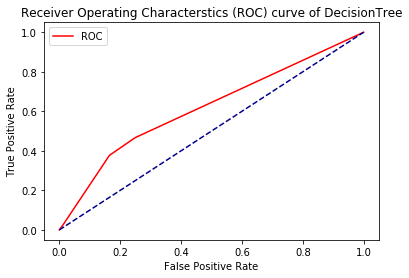

In [100]:
fpr, tpr, thresholds =roc_curve(y_test,probs_t)
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve of DecisionTree')
plt.legend()
plt.show()

###  Random Forest

In [101]:
rf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
model=rf.fit(x_train_sfs,y_train)
pred_rf=rf.predict(x_test_sfs)

In [102]:
print(confusion_matrix(y_test,pred_rf))

[[5017  173]
 [1946  155]]


In [103]:
np.round(roc_auc_score(y_test,pred_rf),2)

0.52

In [104]:
np.round(accuracy_score(y_test,pred_rf),2)

0.71

In [105]:
pred_prob_rf=rf.predict_proba(x_test_sfs)
probs_rf=pred_prob_rf[:,1]
auc = roc_auc_score(y_test, probs_rf)
print('AUC: %.2f' %auc)

AUC: 0.65


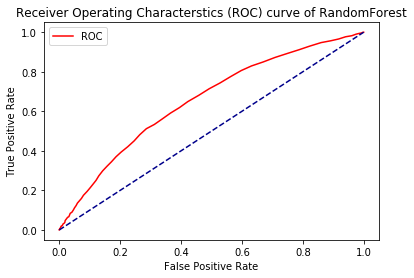

In [106]:
fpr, tpr, thresholds =roc_curve(y_test,probs_rf)
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve of RandomForest')
plt.legend()
plt.show()

### Hyperparameter tuning in Random Forest

In [107]:
params={'n_estimators':[20,50,100,150,200,250],
       'criterion':['gini','entropy'],
       'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [108]:
tune=RandomizedSearchCV(rf,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
tune.fit(x_train_sfs,y_train)
tune.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [109]:
tune.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

In [110]:
#Tuned RandomForest
rf_t=RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=4,max_features='sqrt',
                            max_depth=70,criterion='gini',bootstrap=True)
model=rf_t.fit(x_train_sfs,y_train)
pred_rf_t=rf_t.predict(x_test_sfs)

In [111]:
roc_auc_score(y_test,pred_rf_t)

0.5144865872659959

In [112]:
accuracy_score(y_test,pred_rf_t)

0.7078590042518174

### Gradient Boosting

In [113]:
gbm=GradientBoostingClassifier(random_state=0)
model=gbm.fit(x_train_sfs,y_train)
pred_gbm=gbm.predict(x_test_sfs)

In [114]:
print(confusion_matrix(y_test,pred_gbm))

[[5035  155]
 [2005   96]]


In [115]:
np.round(roc_auc_score(y_test,pred_gbm),2)

0.51

In [116]:
np.round(accuracy_score(y_test,pred_gbm),2)

0.7

In [117]:
pred_prob_gbm=gbm.predict_proba(x_test_sfs)
probs_gbm=pred_prob_gbm[:,1]
auc = roc_auc_score(y_test, probs_gbm)
print('AUC: %.2f' %auc)

AUC: 0.68


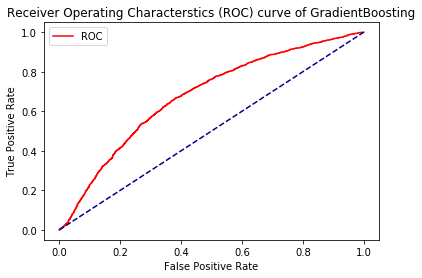

In [118]:
fpr, tpr, thresholds =roc_curve(y_test,probs_gbm)
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve of GradientBoosting')
plt.legend()
plt.show()

### XgBoost

In [119]:
xgb=xgboost.XGBClassifier()
model=xgb.fit(x_train_sfs,y_train)
pred_xgb=xgb.predict(x_test_sfs)

In [120]:
roc_auc_score(y_test,pred_xgb)

0.5043382406212658

### Hyperparameter tuning for XgBoost

In [121]:
params_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.8,0.6 ],
    'n_estimators' :[100,150,200,250,500,1000,1200],
    
}

In [122]:
tuned=RandomizedSearchCV(xgb,param_distributions=params_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
tuned.fit(x_train_sfs,y_train)
tuned.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.9min remaining:   35.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.2min finished


{'n_estimators': 150,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [123]:
tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [124]:
#Tuned XgBoost
xgb_t=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model=xgb_t.fit(x_train_sfs,y_train)
pred_xgb_t=xgb_t.predict(x_test_sfs)

In [125]:
np.round(roc_auc_score(y_test,pred_xgb_t),2)

0.52

In [126]:
np.round(accuracy_score(y_test,pred_xgb_t),2)

0.71

In [127]:
pred_prob_xgb=xgb_t.predict_proba(x_test_sfs)
probs_xgb=pred_prob_xgb[:,1]
auc = roc_auc_score(y_test, probs_xgb)
print('AUC: %.2f' %auc)

AUC: 0.67


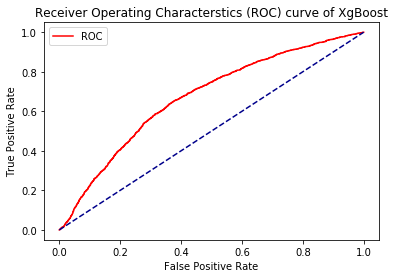

In [128]:
fpr, tpr, thresholds =roc_curve(y_test,probs_xgb)
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve of XgBoost')
plt.legend()
plt.show()

In [129]:
pickle.dump(xgb_t,open('model.pkl','wb'))

In [130]:
model=pickle.load(open('model.pkl','rb'))

In [131]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)